In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Any
from rich.pretty import pprint

from pycomex.functional.experiment import Experiment

In [2]:
PATH = os.getcwd()
RESULTS_PATH = os.path.join(PATH, 'results')

# A list of identifier strings that will be matched to decide which experiments to include 
# in the evaluation. These strings can be used to differentiate between different runs of 
# an experiment.
IDENTIFIERS: List[str] = ['ex_02_c']

In [3]:
# ~ finding experiments

print('traversing experiment namespaces...')
experiment_namespace_paths: List[str] = [
    path
    for file in os.listdir(RESULTS_PATH)
    if os.path.isdir(path := os.path.join(RESULTS_PATH, file))
]
pprint(experiment_namespace_paths)

print('traversing experiment paths...')
experiment_paths: List[str] = [
    path
    for folder_path in experiment_namespace_paths
    for file in os.listdir(folder_path)
    if os.path.isdir(path := os.path.join(folder_path, file))
]
pprint(experiment_paths, max_length=10)

traversing experiment namespaces...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__aqsoldb',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__tan',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/generate_logp_dataset',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__tadf',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__swag',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__ens_mve',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_grad',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/counterfactual_truthfulness__rand',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__qm9',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__lipop',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/test_rep_ens',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore'
]

traversing experiment paths...


[
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/05',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/04',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/25_09_2024__12_39__Hwdx',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/02',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/03',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve__compas/01',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__07_48__brDY',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__08_40__6b0k',
│   '/media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/ex_01_a__31_01_2025__05_13__XulQ',
│   ... +473
]

In [4]:
import time

# ~ loading experiments
# Now that we have the paths to all the experiment archive folders, we can now actually 
# load them back into memory
experiments: List[Experiment] = []

time_start = time.time()
for path in experiment_paths:
    
    experiment_data_path = os.path.join(path, 'experiment_data.json')
    if not os.path.exists(experiment_data_path):
        print(f'no experiment data found at {experiment_data_path}')
        continue
    
    try:
        experiment = Experiment.load(path)
    except:
        continue
    
    # We want to match a specific identifier
    if 'IDENTIFIER' not in experiment.parameters or experiment.parameters['IDENTIFIER'] not in IDENTIFIERS:
        continue
    
    experiments.append(experiment)
    
time_end = time.time()
    
print(f'loaded {len(experiments)} experiments in {time_end - time_start:.1f} seconds')

no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__tscore__euc/test__30_01_2025__17_55__yGhq/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__mve/test__01_02_2025__08_32__9UZB/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_48__uDBP/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/test__05_02_2025__07_09__zUu2/experiment_data.json
no experiment data found at /media/ssd/Programming/truthful_counterfactuals/truthful_counterfactuals/experiments/results/quantify_uncertainty__ens_mve/31_01_2025__09_56__qJAY/experiment_data.json
no

In [5]:
print('example experiment data:')
pprint(experiments[0].data, max_length=10)

from collections import defaultdict

# In this dict data structure, we collect the experiments that will later make up the table where the 
# key is a tuple consisting of two strings (scenario, method) where "scenario" is the string name of 
# IID/OOD scenario that was used and "method" is the string name of the uncertainty quantification 
# method that was used. The value is a list of experiments that match the key.
key_experiment_map: Dict[Tuple[str, str], List[Experiment]] = defaultdict(list)

for experiment in experiments:
    scenario_name = os.path.basename(str(experiment.parameters['TEST_INDICES_PATH'])).removesuffix('.json')
    method_name = experiment.metadata['name'].removeprefix('quantify_uncertainty__')
    
    key = (scenario_name, method_name)
    key_experiment_map[key].append(experiment)
    

# Here we sort the dictionary by the keys so that the table will be nicely ordered
key_experiment_map = dict(sorted(key_experiment_map.items(), key=lambda item: (item[0][0], item[0][1])))
    
pprint(key_experiment_map, max_length=3)

example experiment data:


{
│   'node_dim': 45,
│   'edge_dim': 11,
│   'indices': {
│   │   'train': [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, ... +8809],
│   │   'test': [9956, 9897, 9842, 9817, 9791, 9716, 9692, 9686, 9677, 8959, ... +1093],
│   │   'val': [4483, 10812, 10019, 2489, 6884, 10997, 8859, 10619, 1271, 244, ... +1092]
│   },
│   'test': {
│   │   'metrics': {
│   │   │   'r2': 0.9925038425647742,
│   │   │   'mse': 0.20592337139273642,
│   │   │   'mae': 0.29347930004387485,
│   │   │   'corr': 0.47625508940909206,
│   │   │   'rll': 0.36599418599869493,
│   │   │   'uer_auc_mean': 0.2334442746184772,
│   │   │   'uer_auc_max': 0.6950143278775669
│   │   },
│   │   'duration': {'uncertainty': 0.38370704650878906},
│   │   'values': {
│   │   │   'true': [
│   │   │   │   5.659400000000007,
│   │   │   │   2.8550000000000013,
│   │   │   │   0.7876999999999998,
│   │   │   │   0.8596000000000001,
│   │   │   │   1.4359999999999997,
│   │   │   │   3.6515000000000004,
│   │   │   │   -2.0785,
│   │   │   │   -1.6476000000000002,
│   │   │   │   2.649800000000001,
│   │   │   │   0.9804999999999997,
│   │   │   │   ... +1093
│   │   │   ],
│   │   │   'pred': [
│   │   │   │   5.7434234619140625,
│   │   │   │   2.7749271392822266,
│   │   │   │   0.7492237091064453,
│   │   │   │   0.5113505125045776,
│   │   │   │   1.2360018491744995,
│   │   │   │   3.446981906890869,
│   │   │   │   -2.2517170906066895,
│   │   │   │   -1.767988681793213,
│   │   │   │   2.550050735473633,
│   │   │   │   0.6468430757522583,
│   │   │   │   ... +1093
│   │   │   ],
│   │   │   'sigma': [
│   │   │   │   0.2530865899152747,
│   │   │   │   0.12618436844150613,
│   │   │   │   0.1217765163369846,
│   │   │   │   0.11473732384649496,
│   │   │   │   0.13374112442315764,
│   │   │   │   0.1217765163369846,
│   │   │   │   0.13374112442315764,
│   │   │   │   0.13374112442315764,
│   │   │   │   0.10082035414992198,
│   │   │   │   0.10082035414992198,
│   │   │   │   ... +1093
│   │   │   ]
│   │   }
│   }
}

{
│   ('None', 'ens'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7101d3e6e7d0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101d36884f0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101d2a418a0>,
│   │   ... +2
│   ],
│   ('None', 'ens_mve'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7101e0f598d0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101dec035e0>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101dea5f400>,
│   │   ... +2
│   ],
│   ('None', 'mve'): [
│   │   <pycomex.functional.experiment.Experiment object at 0x7101e6d27130>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101e6de5900>,
│   │   <pycomex.functional.experiment.Experiment object at 0x7101e7d11db0>,
│   │   ... +2
│   ],
│   ... +6
}

In [6]:
from scipy.stats import iqr

column_names = ['Scenario', 'UQ Method', r'$R^2 \uparrow$', r'$\rho \uparrow$', r'$\text{UER-AUC}_{mean} \uparrow$', r'$\text{UER-AUC}_{max} \uparrow$', r'$\text{RLL} \uparrow$']

rows: List[list] = []

for (scenario, method), experiments in key_experiment_map.items():
    
    row = [scenario.replace('_', ' '), method.replace('_', ' ')]
    
    for key in ['r2', 'corr', 'uer_auc_mean', 'uer_auc_max', 'rll']:
        
        values: List[float] = []
        for experiment in experiments:
            if 'test' not in experiment.data or key not in experiment.data['test']['metrics']:
                print(f'problem with {experiment.metadata["name"]}')
                continue
            
            value = float(experiment.data['test']['metrics'][key])
            values.append(value)
        
        if key == 'rll':
            q1 = np.percentile(values, 25)
            q3 = np.percentile(values, 75)
            iqr_value = iqr(values)
            lower_bound = q1 - 1.5 * iqr_value
            upper_bound = q3 + 1.5 * iqr_value
            values = [v for v in values if lower_bound <= v <= upper_bound]
        
        row.append(values)
        
    rows.append(row)
    
pprint(rows, max_length=5)

[
│   [
│   │   'None',
│   │   'ens',
│   │   [0.9957602107180005, 0.9969986518496472, 0.9962001039263501, 0.9958309187876291, 0.9965823128646449],
│   │   [0.6522951135772305, 0.4143358381580189, 0.5706433197304134, 0.744458800275914, 0.4828003291914918],
│   │   [0.2923929265524152, 0.18079000816825885, 0.24816734315501476, 0.31260937885186096, 0.2052166834743121],
│   │   ... +2
│   ],
│   [
│   │   'None',
│   │   'ens mve',
│   │   [0.9881687649744193, 0.9514438979526252, 0.9842800056189395, 0.9881675621926322, 0.9919501597980744],
│   │   [0.3941405336132616, 0.9234648541755602, 0.6229437222346559, 0.753638946230246, 0.49113165333750025],
│   │   [0.22803829023232725, 0.4673623738863888, 0.28604149057715844, 0.27005481024204026, 0.2369062421121888],
│   │   ... +2
│   ],
│   [
│   │   'None',
│   │   'mve',
│   │   [0.9861344647171721, 0.9955088807024834, 0.9920223959986001, 0.9634560639438448, 0.9802618245759459],
│   │   [0.36574360199880124, 0.38364043244194, 0.25117961805796596, 0.452580995841449, 0.5577525267944364],
│   │   [0.18436409924966768, 0.35009054450970656, 0.08541740214032739, 0.15966548245385243, 0.18731076029487767],
│   │   ... +2
│   ],
│   [
│   │   'logp ood struct',
│   │   'ens',
│   │   [0.9975665230885559, 0.9966703720805817, 0.9973815199176513, 0.9955546757345668, 0.9939551695524931],
│   │   [0.5448031161422309, 0.6110297932509626, 0.2910184775646456, 0.34010683854233453, 0.611214833747183],
│   │   [0.22107426156540727, 0.24547521162430652, 0.1723993828259794, 0.18893269194094578, 0.2960453374016993],
│   │   ... +2
│   ],
│   [
│   │   'logp ood struct',
│   │   'ens mve',
│   │   [0.9964283662336533, 0.9345830276183531, 0.9693724471891226, 0.9942609327243779, 0.9852564899964155],
│   │   [0.565879141036144, 0.8570927272099842, 0.8651748794697153, 0.4463053756724462, 0.5619777331653658],
│   │   [0.2648359727083685, 0.36789665359962426, 0.38987744963018534, 0.21627916358307042, 0.25979809565040823],
│   │   ... +2
│   ],
│   ... +4
]

In [7]:
# ~ Generating the latex table

from truthful_counterfactuals.utils import render_latex
from truthful_counterfactuals.utils import latex_table

# ~ rendering latex

tex_content, tex_table = latex_table(
    column_names=column_names,
    rows=rows
)
print(tex_table)

tex_path = os.path.join(PATH, '_results_ex_02.tex')
with open(tex_path, 'w') as file:
    file.write(tex_table)

pdf_path = os.path.join(PATH, '_results_ex_02.pdf')
render_latex({'content': tex_table}, pdf_path)

\begin{tabular}{ ccccccc }
% -- table header --
\toprule
Scenario &
UQ Method &
$R^2 \uparrow$ &
$\rho \uparrow$ &
$\text{UER-AUC}_{mean} \uparrow$ &
$\text{UER-AUC}_{max} \uparrow$ &
$\text{RLL} \uparrow$ \\

\midrule
% -- table content --
% row 1
None &
ens &
$1.00 {\color{gray} \pm \mathsmaller{ 0.00 } }$ &
$0.57 {\color{gray} \pm \mathsmaller{ 0.12 } }$ &
$0.25 {\color{gray} \pm \mathsmaller{ 0.05 } }$ &
$0.69 {\color{gray} \pm \mathsmaller{ 0.21 } }$ &
$0.76 {\color{gray} \pm \mathsmaller{ 0.04 } }$ 
\\
% row 2
None &
ens mve &
$0.98 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.64 {\color{gray} \pm \mathsmaller{ 0.19 } }$ &
$0.30 {\color{gray} \pm \mathsmaller{ 0.09 } }$ &
$0.66 {\color{gray} \pm \mathsmaller{ 0.11 } }$ &
$0.76 {\color{gray} \pm \mathsmaller{ 0.06 } }$ 
\\
% row 3
None &
mve &
$0.98 {\color{gray} \pm \mathsmaller{ 0.01 } }$ &
$0.40 {\color{gray} \pm \mathsmaller{ 0.10 } }$ &
$0.19 {\color{gray} \pm \mathsmaller{ 0.09 } }$ &
$0.61 {\color{gray} \pm \mathsmaller{ 

the chosen experiments:


[
│   <pycomex.functional.experiment.Experiment object at 0x7101e4255db0>,
│   <pycomex.functional.experiment.Experiment object at 0x7101def9a290>,
│   <pycomex.functional.experiment.Experiment object at 0x7101da889ae0>,
│   ... +2
]

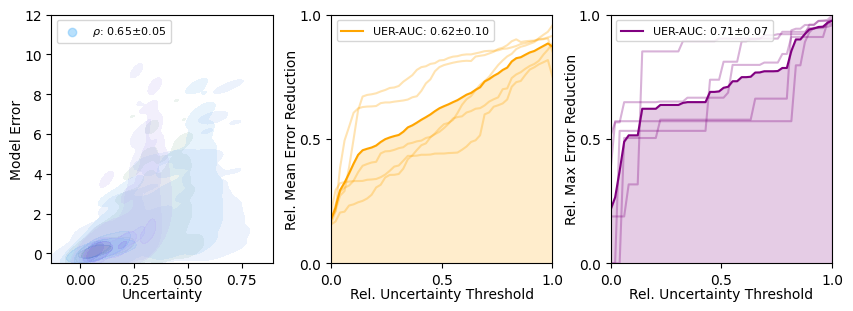

In [24]:
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from truthful_counterfactuals.metrics import threshold_error_reduction

roboto_condensed = FontProperties(fname='/usr/share/fonts/truetype/roboto/unhinted/RobotoCondensed-Regular.ttf')

plt.close('all')
plt.rcdefaults()
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.size'] = 16

# Here I want to plot specific results of one combination of scenario and method to see as examples 
# of how these plots can look like.

scenario = 'logp_ood_value'
method = 'ens_mve'

experiments = key_experiment_map[(scenario, method)]
print('the chosen experiments:')
pprint(experiments, max_length=3)

plt.style.use('default')
fig, (ax_corr, ax_mean, ax_max) = plt.subplots(1, 3, figsize=(8.5, 3), constrained_layout=True)
fig.tight_layout(pad=0.8)

colors = ['#85B09A', '#73C2FB', '#0072BB', '#CCCCFF', '#6F00FF']
ths_means, rds_means = [], []
ths_maxs, rds_maxs = [], []
for color, experiment in zip(colors, experiments):
    
    #pprint(experiment.data, max_length=6)
    out_true = np.array(experiment.data['test']['values']['true'])
    out_pred = np.array(experiment.data['test']['values']['pred'])
    errors = np.abs(out_true - out_pred)
    sigmas = np.array(experiment.data['test']['values']['sigma'])
    corr = experiment.data['test']['metrics']['corr']
    
    sns.kdeplot(x=sigmas, y=errors, ax=ax_corr, fill=True, levels=4, alpha=0.2, color=color, thresh=0.01)
    
    ths_mean, rds_mean = threshold_error_reduction(
        sigmas, errors,
        num_bins=50,
        error_func=np.mean,
    )
    ths_means.append(ths_mean)
    rds_means.append(rds_mean)
    ax_mean.plot(ths_mean, rds_mean, color='orange', alpha=0.3)
    
    ths_max, rds_max = threshold_error_reduction(
        sigmas, errors,
        num_bins=50,
        error_func=np.max,
    )
    ths_maxs.append(ths_max)
    rds_maxs.append(rds_max)
    ax_max.plot(ths_max, rds_max, color='purple', alpha=0.3)
    
    
# Calculate the average of ths_means and rds_means
ths_means_avg = np.mean(ths_means, axis=0)
rds_means_avg = np.mean(rds_means, axis=0)
uer_auc_mean_mean = np.mean([experiment.data['test']['metrics']['uer_auc_mean'] for experiment in experiments])
uer_auc_max_std = np.std([experiment.data['test']['metrics']['uer_auc_mean'] for experiment in experiments])
# Plot the average with alpha=1.0
ax_mean.plot(ths_means_avg, rds_means_avg, color='orange', alpha=1.0, 
             label=f'UER-AUC: {uer_auc_mean_mean:.2f}$\pm${uer_auc_max_std:.2f}')
ax_mean.legend(loc='upper left', fontsize=8)
# Fill the area underneath with a lighter color
ax_mean.fill_between(ths_means_avg, rds_means_avg, color='orange', alpha=0.2)

# Calculate the average of ths_maxs and rds_maxs
ths_maxs_avg = np.mean(ths_maxs, axis=0)
rds_maxs_avg = np.mean(rds_maxs, axis=0)
uer_auc_max_mean = np.mean([experiment.data['test']['metrics']['uer_auc_max'] for experiment in experiments])
uer_auc_max_std = np.std([experiment.data['test']['metrics']['uer_auc_max'] for experiment in experiments])
# Plot the average with alpha=1.0
ax_max.plot(ths_maxs_avg, rds_maxs_avg, color='purple', alpha=1.0, 
            label=f'UER-AUC: {uer_auc_max_mean:.2f}$\pm${uer_auc_max_std:.2f}')
ax_max.legend(loc='upper left', fontsize=8)
# Fill the area underneath with a lighter color
ax_max.fill_between(ths_maxs_avg, rds_maxs_avg, color='purple', alpha=0.2)

labelpad = 0
ax_mean.set_xlabel('Rel. Uncertainty Threshold', labelpad=labelpad)
ax_mean.set_ylabel('Rel. Mean Error Reduction', labelpad=labelpad)
ax_mean.set_xlim(0, 1)
ax_mean.set_ylim(0, 1)
ax_mean.set_yticks([0, 0.5, 1])
ax_mean.set_xticks([0, 0.5, 1])

ax_max.set_xlabel('Rel. Uncertainty Threshold', labelpad=labelpad)
ax_max.set_ylabel('Rel. Max Error Reduction', labelpad=labelpad)
ax_max.set_xlim(0, 1)
ax_max.set_ylim(0, 1)
ax_max.set_yticks([0, 0.5, 1])
ax_max.set_xticks([0, 0.5, 1])

ax_corr.set_xlabel('Uncertainty', labelpad=labelpad)
ax_corr.set_ylabel('Model Error', labelpad=labelpad)
ax_corr.set_ylim(-0.5, 12)

# Manually adding labels to the ax_corr axis with the correct colors and correlation values
corr_mean = np.mean([experiment.data['test']['metrics']['corr'] for experiment in experiments])
corr_std = np.std([experiment.data['test']['metrics']['corr'] for experiment in experiments])
ax_corr.scatter([], [], color=colors[1], alpha=0.5, label=f'$\\rho$: {corr_mean:.2f}$\pm${corr_std:.2f}')

    

ax_corr.legend(loc='upper left', fontsize=8)

fig.savefig(os.path.join(PATH, '_fig_ex_02.pdf'))
fig.show()
